# Problem: Use torchvision.transforms for Data Augmentation

### Problem Statement
You are tasked with applying data augmentation techniques to image data using **torchvision.transforms**. The goal is to enhance the variability of the input data by applying the following transformations:
- **Random Horizontal Flip**: Flip the image horizontally with a probability of 0.5.
- **Random Crop**: Randomly crop the image to a specific size.
- **Normalization**: Normalize the image using a specified mean and standard deviation.

Additionally, you will visualize a batch of augmented images to verify the transformations have been applied correctly.

### Requirements
1. **Apply Data Augmentation**:
   - Use **torchvision.transforms** to apply:
     - **Random Horizontal Flip**: Flip the image randomly with a probability of 0.5.
     - **Random Crop**: Randomly crop the image to a size of 28x28.
     - **Normalization**: Normalize the image with specified mean and standard deviation values.

2. **Verify Augmentation**:
   - Visualize a batch of augmented images using **matplotlib** to ensure the transformations are applied correctly.

### Constraints
- Ensure the transformations are applied in the correct order.
- Normalize the images using appropriate values for mean and standard deviation, such as those used in common datasets like CIFAR-10.

<details>
  <summary>💡 Hint</summary>
  Define the transforms.Compose pipeline:
  <br>
  Include RandomHorizontalFlip, RandomCrop, and Normalize in the correct sequence.
  <br>
  <br>
  Visualize the Augmentation:
  <br>
  Use imshow to confirm that the transformations are applied correctly.
</details>


In [1]:
import torch
import torchvision
import torchvision.transforms as transforms
import torch.utils.data as data
import matplotlib.pyplot as plt
import numpy as np

In [3]:
# Load CIFAR-10 dataset with data augmentation
# TODO: Apply random horizontal flip, random crop, and normalization to the images
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.RandomHorizontalFlip(),
    transforms.RandomCrop(28),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

train_dataset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=64, shuffle=True)

test_dataset = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=64, shuffle=False)

100.0%


Extracting ./data\cifar-10-python.tar.gz to ./data
Files already downloaded and verified


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.558952..1.82].


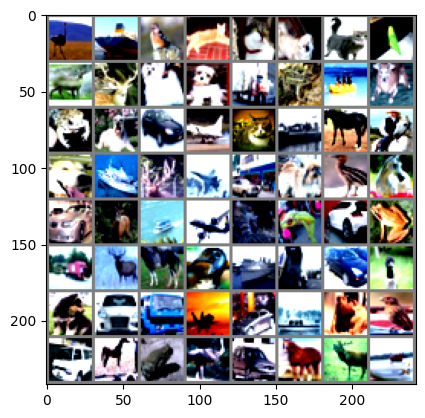

In [4]:
# Display a batch of augmented images
def imshow(img):
    img = img / 2 + 0.5  # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

# Get some random training images
data_iter = iter(train_loader)
images, labels = next(data_iter)

# Show images
imshow(torchvision.utils.make_grid(images))
